In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [4]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df = pd.read_csv(path)

In [5]:
#count = (df["Values"] == 347975206).sum()
#df.drop(df[df["Values"] == 347975206].index, inplace=True)

In [6]:
#overcharged_players = df.loc[df["Values"] == 347975206]

In [7]:
count = (df["Values"] >= 50000000).sum()
df.drop(df[df["Values"] >= 500000006].index, inplace=True)


In [8]:
df.drop(df[df["Values"] > 50000000].index, inplace=True)


In [9]:
count = (df["Values"] <= 50000).sum()
count

164

In [10]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [11]:
df

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
9,Lionel Messi,AM/S RC,35,180,200,"Argentina,Spain",Paris Saint-Germain,15,15,20,17,19,18,10,16,4,4,19,17,7,20,7,17,10,16,11,20,18,20,20,14,13,5,12,7,15,15,18,6,14,15,12,9,16,9,18,6,12,2,2,3,2,2,2,2,1,3,1,3,17,18,5,17,19,17,15,14,1,1,1,1,1,1,1,8,12,8,11,19,20,19,169,67,20,12,43973205,9374,9359,9267,Mediterranean_Hispanic,172,3,1987/6/24,162,86,776712.0,NaN,7458500
10,Luka Modrić,M C,36,179,180,Croatia,R. Madrid,16,16,17,9,20,13,8,14,7,8,19,14,11,19,12,17,14,18,18,19,18,17,13,14,15,15,17,16,12,14,13,7,13,13,13,8,15,12,16,11,16,2,2,1,3,3,1,1,2,1,2,1,10,15,5,17,17,20,19,17,1,1,1,1,1,1,14,8,20,5,1,15,1,1,172,67,13,20,30331138,9000,9265,9000,Northern_European,176,5,1985/9/9,152,22,321918.0,NaN,653054
28,Thiago Silva,D C,37,168,174,"Brazil,France",Chelsea,4,5,9,7,14,8,17,7,7,17,13,14,16,13,17,17,15,20,17,13,17,15,8,19,8,19,15,14,10,12,16,13,14,10,14,14,15,7,13,11,8,4,2,2,3,1,3,2,2,1,1,2,13,17,6,15,11,20,18,15,1,1,20,1,1,1,1,1,1,1,1,1,1,1,183,79,8,20,26674923,8400,8250,7750,Mixed_Race,164,12,1984/9/22,107,7,114999.0,NaN,8833628
30,N'Golo Kanté,DM/M C,31,167,170,"France,Mali",Chelsea,6,12,11,10,14,8,10,10,6,12,15,9,19,14,15,20,15,14,16,14,16,19,13,5,15,15,20,20,14,13,15,7,18,14,18,11,19,5,20,8,10,1,3,2,2,1,3,3,1,2,3,2,18,13,1,17,15,20,15,15,1,1,1,1,1,1,18,12,20,12,10,14,12,1,168,72,8,20,48067182,8350,8200,8000,African_Caribbean,156,17,1991/3/29,53,2,336376.0,NaN,85081880
35,Toni Kroos,DM/M C,32,166,176,Germany,R. Madrid,19,18,14,13,18,14,7,17,8,8,20,13,9,16,9,17,9,18,14,18,17,10,11,12,15,14,16,11,11,10,12,10,12,12,12,14,13,10,14,7,13,1,3,2,3,1,1,3,1,1,1,3,8,14,7,10,14,17,18,17,1,1,1,1,1,1,17,10,20,1,1,11,1,1,183,76,15,20,37521116,8300,8500,7700,Northern_European,164,5,1990/1/4,105,17,359588.0,NaN,156772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,Callum Perry,M/AM L,16,48,140,England,Coventry City,5,9,12,5,4,4,2,5,4,2,12,1,5,9,12,5,4,4,3,8,6,7,11,9,9,1,6,11,13,13,5,8,6,12,10,3,8,8,11,13,10,3,2,1,3,3,2,1,3,1,2,3,16,12,5,11,12,11,11,17,1,1,1,1,1,1,1,20,1,1,20,1,1,1,174,0,20,7,235092,2412,2787,602,Northern_European,40,255,2005/10/12,0,0,203.0,NaN,2000218865
8446,William Gutierrez Ramirez,D R,16,46,135,England,Reading,3,3,3,4,8,1,6,3,4,7,5,2,4,7,8,9,7,6,8,6,14,10,5,4,1,8,6,6,14,14,5,2,13,10,6,1,12,7,7,5,9,2,3,1,3,3,3,2,3,2,2,1,8,11,3,10,10,10,10,12,1,1,1,20,1,15,1,1,1,1,1,1,1,1,158,0,7,20,132370,2049,1708,171,Mediterranean_Hispanic,32,10,2006/6/22,0,0,203.0,NaN,2000224941
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,4,4,1,6,1,5,6,3,1,12,6,7,9,7,6,9,6,12,11,5,3,5,11,6,6,13,10,6,11,16,12,6,7,17,5,7,5,8,3,2,1,2,2,1,3,3,2,1,3,14,12,1,9,11,11,11,20,1,20,1,1,1,1,1,1,1,1,1,1,1,1,181,0,20,7,124343,2120,2270,236,Northern_European,41,3,2006/6/

In [12]:
df.columns

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggressiion',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decision', 'Determination', 'Flair', 'Leadership', 'Off The Ball',
       'Position.1', 'Teamwork', 'Work Rate', 'Acceleration', 'Agility',
       'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina',
       'Strength', 'Stability', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 

In [13]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [14]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [15]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Paulo Dybala,AM/S RC,28,160,177,Associazione Sportiva Roma,16,15,18,15,18,17,13,17,4,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,5,11,16,13,1,2,3,3,3,3,3,2,3,1,3,14,14,12,9,9,11,13,15,1,1,1,1,1,1,1,1,1,1,12,20,15,20,177,79,20,10,20000000,14044150,AMC
1,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
2,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
3,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
4,David Silva,M/AM RLC,36,151,179,Real San Sebastián,13,13,18,11,18,14,9,13,5,8,17,12,9,19,12,14,13,17,15,18,17,15,17,12,18,8,15,14,9,12,14,7,13,9,10,9,16,9,14,13,13,3,2,2,2,3,1,2,1,2,3,3,13,16,7,13,15,13,15,17,1,1,1,1,1,1,4,15,20,15,15,20,15,9,173,67,20,12,3569836,7458280,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
685,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
686,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
687,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


Keep Attibutes


In [16]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [17]:
amr_df = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [18]:
amr_df

,Age,Values,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,diversity
0,28,20000000,16,15,18,15,18,17,13,17,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,13
1,30,36552285,15,15,15,15,17,15,7,13,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,15
2,29,43312502,15,13,16,15,16,15,6,14,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,13
3,24,34748999,11,12,15,17,15,14,8,14,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,10
4,36,3569836,13,13,18,11,18,14,9,13,8,17,12,9,19,12,14,13,17,15,18,17,15,17,12,18,8,15,14,9,12,14,7,13,9,10,9,16,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,16,8871048,6,6,8,7,14,4,7,6,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,9
685,16,9678350,10,8,11,9,12,11,1,10,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,15
686,17,2977776,5,2,6,7,13,3,7,7,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,13
687,17,8861769,3,6,9,4,12,4,4,4,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,15


In [19]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df[AMR_detailed_features]
y = amr_df["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 15)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [20]:
np.sort(fs.scores_)


array([2.09137607e-05, 3.27967879e-04, 1.68815465e-02, 1.89016345e-02,
       2.54770053e-02, 3.72222797e-02, 3.78016269e-02, 7.92342611e-02,
       8.37266121e-02, 1.01170982e-01, 1.33587510e-01, 1.96006346e-01,
       3.46843000e-01, 3.81890917e-01, 3.89607152e-01, 6.04605546e-01,
       7.00162035e-01, 8.77832055e-01, 9.16837011e-01, 1.00683528e+00,
       1.00874275e+00, 1.10623224e+00, 1.25649114e+00, 1.27301926e+00,
       1.29457098e+00, 1.39616025e+00, 1.59394075e+00, 1.76855669e+00,
       1.83078055e+00, 3.77850550e+00, 4.06594504e+00, 5.36882053e+00,
       6.00021185e+00, 6.20496471e+00, 7.47693757e+00, 1.37561636e+01,
       1.61710232e+01])

In [21]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Heading',
 'Long Shots',
 'Marking',
 'Anticipation',
 'Vision',
 'Decision',
 'Flair',
 'Leadership',
 'Off The Ball',
 'Position.1',
 'Acceleration',
 'Balance',
 'Natural Fitness',
 'Pace',
 'Stability']

In [22]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']

In [23]:

amr_df = amr_df.loc[:, AMR_essential_ft]

In [24]:

# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)


Correlation

In [25]:
#looking for correlation
corr_matrix = amr_df.corr()
corr_matrix

,Heading,Long Shots,Marking,Anticipation,Vision,Decision,Flair,Leadership,Off The Ball,Position.1,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
Heading,1.000000,0.235811,0.327949,0.317743,0.021366,0.133164,-0.136376,0.228067,0.249028,0.272169,-0.031283,0.235210,0.082808,0.024054,0.090686,-0.088058,-0.268167
Long Shots,0.235811,1.000000,0.050713,0.414123,0.414789,0.202535,0.196469,0.277927,0.355135,0.109598,-0.050269,0.375613,0.124129,-0.001094,-0.008084,-0.050673,-0.473585
Marking,0.327949,0.050713,1.000000,0.189756,0.033389,0.141545,-0.199016,0.219121,0.133827,0.579447,-0.069008,0.148363,0.032783,-0.041862,0.143277,-0.042727,-0.153882
Anticipation,0.317743,0.414123,0.189756,1.000000,0.363408,0.350774,0.158782,0.353199,0.507809,0.221162,-0.041949,0.471824,0.095555,-0.030029,0.054550,-0.045035,-0.533651
Vision,0.021366,0.414789,0.033389,0.363408,1.000000,0.337647,0.374384,0.306039,0.367617,0.129661,-0.184451,0.348938,0.020365,-0.117064,-0.069716,-0.043369,-0.508461
Decision,0.133164,0.202535,0.141545,0.350774,0.337647,1.000000,0.074010,0.291139,0.345829,0.225598,-0.137774,0.149567,-0.027073,-0.153961,0.143129,-0.093050,-0.385578
Flair,-0.136376,0.196469,-0.199016,0.158782,0.374384,0.074010,1.000000,0.012704,0.150965,-0.168627,0.059619,0.202458,-0.026078,-0.006147,-0.096820,0.051554,-0.251551
Leadership,0.228067,0.277927,0.219121,0.353199,0.306039,0.291139,0.012704,1.000000,0.251587,0.260042,-0.192757,0.256790,0.001475,-0.161816,0.158679,-0.103761,-0.443397
Off The Ball,0.249028,0.355135,0.133827,0.507809,0.367617,0.345829,0.150965,0.251587,1.000000,0.164195,0.013961,0.408851,0.136832,0.048807,0.031891,-0.073959,-0.521717
Position.1,0.272169,0.109598,0.579447,0.221162,0.129661,0.225598,-0.168627,0.260042,0.164195,1.000000,-0.119568,0.200028,0.032529,-0.080100,0.116353,-0.076705,-0.210441


Text(0.5, 1.0, 'Correlation Heatmap')

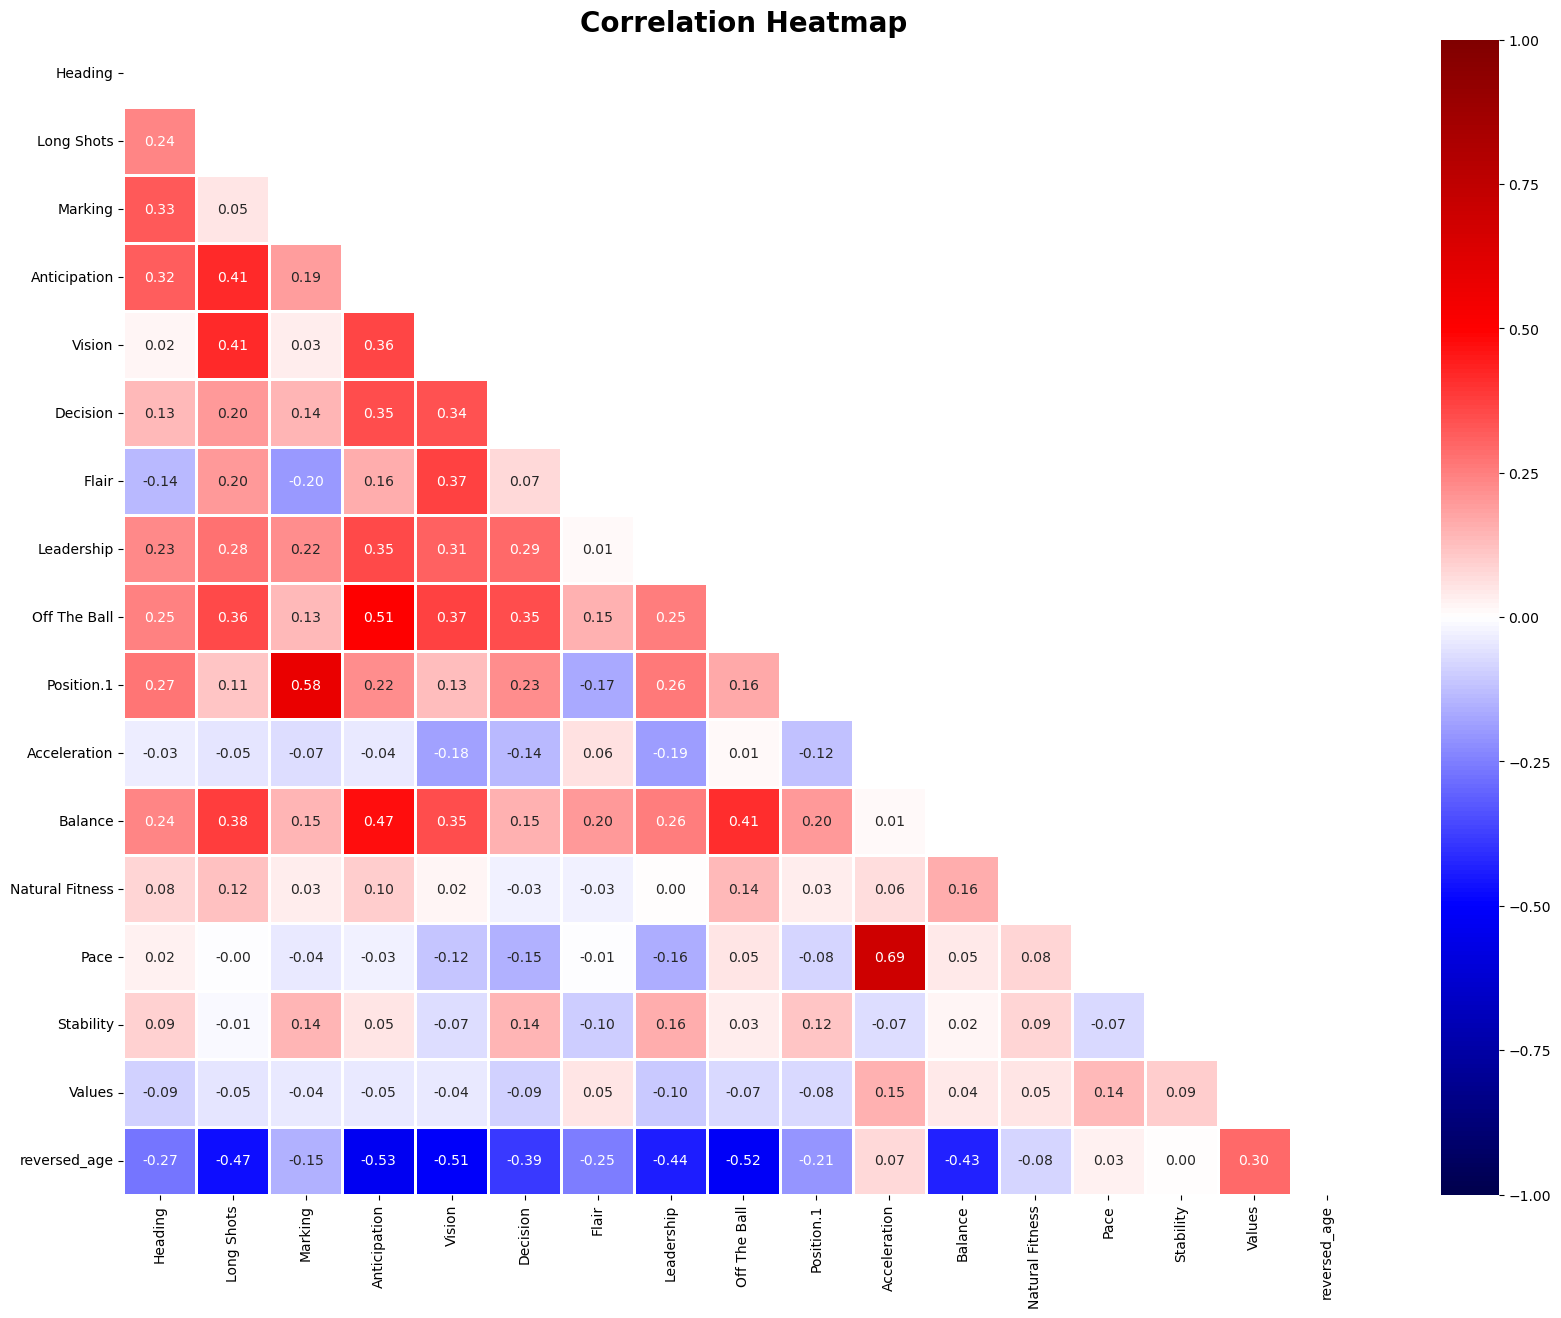

In [26]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [27]:
""" 
# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)
 """

" \n# Assuming df is your DataFrame\nmax_age = amr_df['Age'].max()\namr_df['reversed_age'] = max_age - amr_df['Age']\namr_df.drop(columns=['Age'], inplace=True)\n "

In [28]:
#y_log = np.log10(y_train)


In [29]:
X = amr_df.copy()
values = X.pop("Values")
y = np.log10(values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 278 to 102
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Heading          551 non-null    int64
 1   Long Shots       551 non-null    int64
 2   Marking          551 non-null    int64
 3   Anticipation     551 non-null    int64
 4   Vision           551 non-null    int64
 5   Decision         551 non-null    int64
 6   Flair            551 non-null    int64
 7   Leadership       551 non-null    int64
 8   Off The Ball     551 non-null    int64
 9   Position.1       551 non-null    int64
 10  Acceleration     551 non-null    int64
 11  Balance          551 non-null    int64
 12  Natural Fitness  551 non-null    int64
 13  Pace             551 non-null    int64
 14  Stability        551 non-null    int64
 15  reversed_age     551 non-null    int64
dtypes: int64(16)
memory usage: 73.2 KB


In [31]:
y_train

278    5.990288
110    6.302822
82     7.300274
51     7.039682
218    6.663418
         ...   
71     6.706448
106    6.828156
270    6.465652
435    6.643453
102    6.862798
Name: Values, Length: 551, dtype: float64

In [32]:
X_test.describe()

,Heading,Long Shots,Marking,Anticipation,Vision,Decision,Flair,Leadership,Off The Ball,Position.1,Acceleration,Balance,Natural Fitness,Pace,Stability,reversed_age
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,7.695652,11.543478,6.644928,11.463768,13.427536,11.963768,14.000000,9.282609,12.666667,8.072464,12.514493,11.398551,12.210145,12.282609,11.789855,16.985507
std,2.366459,2.270469,1.969848,2.467776,1.867461,2.019646,1.887338,3.315500,2.148954,2.087983,1.635534,2.495368,2.331795,1.542531,2.414835,5.283200
min,1.000000,5.000000,1.000000,3.000000,8.000000,5.000000,9.000000,1.000000,3.000000,3.000000,8.000000,3.000000,5.000000,8.000000,5.000000,4.000000
25%,6.000000,10.000000,5.000000,10.250000,12.000000,10.250000,13.000000,7.000000,12.000000,7.000000,12.000000,10.000000,11.000000,12.000000,11.000000,13.000000
50%,7.000000,11.000000,7.000000,12.000000,13.000000,12.000000,14.000000,10.000000,13.000000,8.000000,13.000000,12.000000,12.000000,13.000000,12.000000,17.500000
75%,9.000000,13.000000,8.000000,13.000000,14.750000,13.000000,15.000000,11.000000,14.000000,10.000000,14.000000,13.000000,14.000000,13.000000,13.000000,21.750000
max,14.000000,17.000000,13.000000,17.000000,19.000000,17.000000,19.000000,18.000000,18.000000,14.000000,16.000000,17.000000,17.000000,16.000000,20.000000,25.000000


In [33]:
y_test.describe()

count    138.000000
mean       6.549213
std        0.619351
min        4.857332
25%        6.233551
50%        6.620074
75%        6.933107
max        7.687975
Name: Values, dtype: float64

Feature Selection - Variance

In [34]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [35]:
range_var_df.head()

,Range,Variance
Pace,9,1.826312
Acceleration,10,2.233585
Vision,13,3.472589
Decision,12,3.649517
Off The Ball,13,3.925042


In [36]:
range_var_df.tail()

,Range,Variance
Stability,15,5.903732
Balance,16,6.241788
Heading,15,6.330579
Leadership,17,9.830794
reversed_age,26,26.755862


ML

In [37]:
""" from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = RandomizedSearchCV(model_pipeline,
                                param_grid,
                                scoring="neg_mean_absolute_percentage_error",
                                n_iter=50,
                                cv=5,
                                n_jobs=-1,
                                random_state=123)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")
 """

' from xgboost import XGBRegressor\n\nmodel_pipeline = make_pipeline(#StandardScaler(), \n                               XGBRegressor(random_state=123))\n#y_scaler = StandardScaler()\n#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()\n\nparam_grid = {"xgbregressor__n_estimators": [100, 500, 1000],\n              "xgbregressor__max_depth": [3, 5, 7],\n              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}\n\nxgb_search = RandomizedSearchCV(model_pipeline,\n                                param_grid,\n                                scoring="neg_mean_absolute_percentage_error",\n                                n_iter=50,\n                                cv=5,\n                                n_jobs=-1,\n                                random_state=123)\n\nxgb_search.fit(X_train, y_train)\n\nbest_score_search_xgb = xgb_search.best_score_\n\nprint(f"{best_score_search_xgb} MAPE")\n '

In [38]:
from sklearn.preprocessing import MinMaxScaler


In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)

In [46]:
output = tree.predict(X_train)

In [47]:
output - y_train

278    0.272107
110    0.205142
82    -0.001442
51    -0.531717
218   -0.172783
         ...   
71    -0.198484
106    0.080114
270    0.042312
435   -0.135488
102   -0.354834
Name: Values, Length: 551, dtype: float64

In [39]:
""" from xgboost import XGBRegressor#
from sklearn.model_selection import KFold

model_pipeline = make_pipeline(#MinMaxScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = GridSearchCV(model_pipeline,
                          param_grid,
                          scoring="neg_mean_absolute_percentage_error",
                          cv=5,
                          n_jobs=-1)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")
 """

-0.9237218176762283 MAPE


In [40]:
xgb_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_const...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=123, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': [1e-08, 1e-07, 1e-09],
                         'xgbregressor__max_depth': [3, 5, 7],
                         'xgbregressor__n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_percentage_error')

In [41]:
best_score_search_xgb

-0.9237218176762283

Metric

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [43]:
dt_predictions = xgb_search.predict(X_test)

In [48]:
tree_predict = tree.predict(X_test)

In [44]:
X_test

,Heading,Marking,Anticipation,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Acceleration,Balance,Natural Fitness,Pace,Stability,reversed_age
570,7,7,11,12,11,10,14,10,8,8,13,7,11,11,10,23
265,12,5,13,10,10,7,13,6,14,6,14,9,13,13,12,14
291,6,6,14,14,15,14,14,14,14,11,11,13,13,12,13,9
597,8,5,9,11,8,14,14,6,10,6,11,12,14,12,14,25
174,8,8,12,13,13,15,9,11,15,8,13,9,12,14,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11,12,12,14,10,10,10,7,13,13,13,11,12,10,10,19
29,5,6,13,15,14,15,17,9,12,8,13,16,13,13,13,17
586,7,6,6,15,15,16,13,8,16,10,10,12,7,9,11,23
135,6,7,11,14,12,12,16,10,12,7,13,15,12,13,12,13


In [45]:
dt_predictions

array([0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059605,
       0.50059605, 0.50059605, 0.50059605, 0.50059605, 0.50059

In [46]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [47]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["xgboost"])

,MAE,RMSE,MAPE,R2
xgboost,6.096658,6.123136,0.923528,-114.876243


In [53]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = tree_predict)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = tree_predict, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = tree_predict)
dt_r2 = r2_score(y_true = y_test, y_pred = tree_predict)

In [54]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["tree"])

,MAE,RMSE,MAPE,R2
tree,0.47323,0.609235,0.074698,0.025337


In [48]:
X_test.head()


,Heading,Marking,Anticipation,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Acceleration,Balance,Natural Fitness,Pace,Stability,reversed_age
570,7,7,11,12,11,10,14,10,8,8,13,7,11,11,10,23
265,12,5,13,10,10,7,13,6,14,6,14,9,13,13,12,14
291,6,6,14,14,15,14,14,14,14,11,11,13,13,12,13,9
597,8,5,9,11,8,14,14,6,10,6,11,12,14,12,14,25
174,8,8,12,13,13,15,9,11,15,8,13,9,12,14,12,15


In [49]:
y_test.head

<bound method NDFrame.head of 570    5.448202
265    6.364719
291    5.963942
597    6.870182
174    6.597695
         ...   
419    7.450249
29     7.499991
586    6.803670
135    5.399381
438    7.561698
Name: Values, Length: 128, dtype: float64>

In [50]:
np.array([y_test])


array([[5.44820218, 6.36471905, 5.96394169, 6.87018173, 6.59769486,
        6.36876741, 6.44987996, 6.51664694, 7.34363701, 6.53352969,
        6.52113795, 6.73239376, 7.42915112, 7.48996126, 6.8627983 ,
        5.82330009, 6.6112737 , 7.58376537, 6.41178767, 7.51851394,
        6.62748445, 6.21665694, 6.9618243 , 6.04376377, 6.73566061,
        6.18875389, 7.38165648, 7.14550714, 6.7359978 , 6.69548159,
        6.63548375, 6.94797493, 6.78071772, 6.36485049, 7.05557487,
        6.5007849 , 6.68930193, 6.57208289, 7.5409423 , 6.61395371,
        6.35793485, 6.37832412, 6.58442294, 5.46398849, 7.17609126,
        6.68520001, 5.7756847 , 7.20624915, 6.58092475, 6.48518873,
        7.07371835, 5.58297533, 6.26966422, 6.75046975, 5.16239412,
        7.26576094, 6.43639771, 6.49968695, 6.82280173, 6.03749741,
        6.29611276, 6.52544508, 6.84600006, 5.4588523 , 7.01795107,
        7.58030089, 7.27691682, 6.08813573, 7.09972683, 7.1931246 ,
        5.42833893, 6.8881827 , 6.44626386, 5.88

In [51]:
#amr_df['predicted_values'] = xgb_search.predict(amr_df.loc[:,cols])


In [52]:
#xgb_search

In [55]:
10**tree_predict

array([ 3220805.28655063,  7248252.02875991,   480230.82966424,
        3220805.28655063,  3220805.28655063,  8607626.86176651,
        1740959.20526355,  3220805.28655063, 11324805.33386679,
       19899026.86322373,  7248252.02875991,  2994963.83640449,
        1740959.20526355,  3220805.28655063,  7248252.02875991,
       11324805.33386679,  3094819.53564067,  3220805.28655063,
        9558449.13013817,  8095990.92546775,  3220805.28655063,
        3220805.28655063,  3220805.28655063, 22238029.02592054,
        3220805.28655063,  3220805.28655063,  3220805.28655063,
        7159862.32722473, 11324805.33386679,   214485.        ,
        7159862.32722473,  3220805.28655063,  3220805.28655063,
        9986125.42806513,  7159862.32722473,  3094819.53564067,
        3220805.28655063,  3220805.28655063,  3094819.53564067,
        3220805.28655063,  3220805.28655063,  3220805.28655063,
        3094819.53564067,  1235924.09701769,  7248252.02875991,
       18472589.35825257, 18472589.35825

In [65]:

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value tree': 10**tree_predict ,
                           'Actual Market Value': 10**y_test}).sort_values(by='Actual Market Value')

In [66]:
results_df

,Predicted Market Value tree,Actual Market Value
670,1.740959e+06,72000.0
655,7.248252e+06,72595.0
451,3.220805e+06,104553.0
360,6.697600e+05,149636.0
335,2.144850e+05,161973.0
...,...,...
72,3.220805e+06,41339997.0
6,3.220805e+06,41548240.0
2,8.607627e+06,43312502.0
490,2.223803e+07,44865603.0


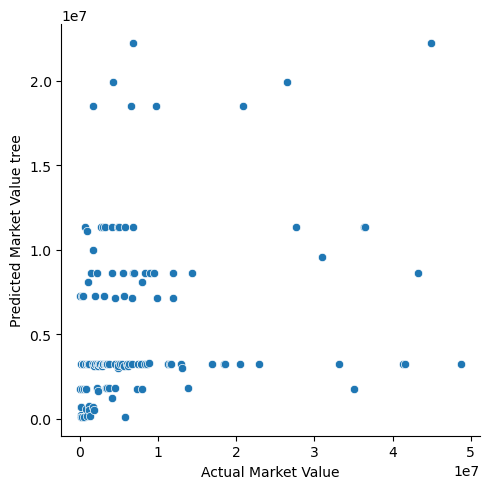

In [67]:
sns.relplot(data=results_df,x='Actual Market Value',y='Predicted Market Value tree')

In [53]:
# Assuming you have trained your model and obtained predictions on the testing dataset
xgpred = xgb_search.predict(X_test)
# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value (xg)': xgpred ,
                           'Actual Market Value': y_test})

In [58]:
results_df['Predicted Market Value (xg)'].unique()


array([0.50059605], dtype=float32)

<Axes: >

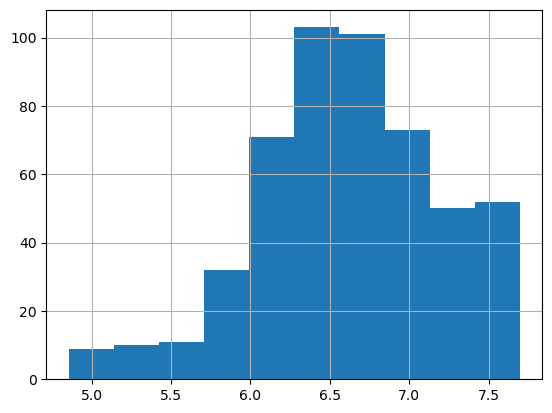

In [59]:
y_train.hist()

In [55]:
amr_df

,Heading,Marking,Anticipation,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
0,7,7,13,16,14,9,15,8,15,8,15,15,12,14,14,36552285,11
1,6,5,13,16,15,16,16,16,14,8,15,16,12,15,12,43312502,12
2,8,6,16,15,14,14,14,8,15,10,15,14,13,15,13,34748999,17
3,12,6,16,19,17,13,18,13,16,8,11,14,12,10,15,14778545,10
4,10,6,17,17,9,14,17,11,14,6,14,12,15,13,11,41548240,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,7,7,9,10,12,17,15,7,11,8,10,8,14,10,20,8871048,25
636,1,1,7,10,5,4,18,4,8,3,11,9,14,10,6,9678350,25
637,7,5,9,13,13,14,13,4,10,5,7,6,14,7,10,2977776,24
638,4,5,7,12,12,3,14,2,10,5,12,5,14,12,6,8861769,24
